In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('kddcup99_csv.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
R2L=['warezmaster','warezclient','spy','phf','multihop','imap','guess_passwd','ftp_write']

U2R=['rootkit','perl','loadmodule','buffer_overflow']
DoS=['smurf','teardrop','back','land','neptune','pod']
Probe=['ipsweep','nmap','portsweep','satan']

In [7]:
def classify(data,label):
    type=[]
    for i in data['label']:
        if i == 'normal':
            type.append('Normal')
        elif i in R2L:
            type.append('R2L')
        elif i in U2R:
            type.append('U2R')
        elif i in DoS:
            type.append('DoS')
        else:
            type.append('Probe')
    return type
data['check']=classify(data,'label')

In [8]:
data.head(10000)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,check
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9996,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9997,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9998,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS


In [9]:
data1 = data[['src_bytes', 'count', 'service', 'srv_count', 'protocol_type',
       'diff_srv_rate', 'same_srv_rate', 'flag', 'dst_bytes',
       'srv_serror_rate', 'logged_in', 'duration', 'lnum_compromised',
       'wrong_fragment', 'is_guest_login', 'num_failed_logins', 'label', 'check']]

In [10]:
data1.rename(columns = {'label':'attack_types', 'check':'label'}, inplace = True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
data1.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,http,8,tcp,0.0,1.0,SF,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,http,8,tcp,0.0,1.0,SF,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,http,8,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,http,6,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,http,6,tcp,0.0,1.0,SF,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9996,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9997,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9998,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS


In [12]:
data1.shape

(494020, 18)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_bytes          494020 non-null  int64  
 1   count              494020 non-null  int64  
 2   service            494020 non-null  object 
 3   srv_count          494020 non-null  int64  
 4   protocol_type      494020 non-null  object 
 5   diff_srv_rate      494020 non-null  float64
 6   same_srv_rate      494020 non-null  float64
 7   flag               494020 non-null  object 
 8   dst_bytes          494020 non-null  int64  
 9   srv_serror_rate    494020 non-null  float64
 10  logged_in          494020 non-null  int64  
 11  duration           494020 non-null  int64  
 12  lnum_compromised   494020 non-null  int64  
 13  wrong_fragment     494020 non-null  int64  
 14  is_guest_login     494020 non-null  int64  
 15  num_failed_logins  494020 non-null  int64  
 16  at

In [14]:
data1['protocol_type'] = data1['protocol_type'].astype('category')
data1['service'] = data1['service'].astype('category')
data1['flag'] = data1['flag'].astype('category')
cat_columns = data1.select_dtypes(['category']).columns
data1[cat_columns] = data1[cat_columns].apply(lambda x: x.cat.codes)

<ipython-input-14-ef86d9635507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['protocol_type'] = data1['protocol_type'].astype('category')
<ipython-input-14-ef86d9635507>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['service'] = data1['service'].astype('category')
<ipython-input-14-ef86d9635507>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [15]:
data1.head()

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,22,8,1,0.0,1.0,9,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,22,8,1,0.0,1.0,9,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,22,8,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,22,6,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,22,6,1,0.0,1.0,9,2032,0.0,1,0,0,0,0,0,normal,Normal


In [16]:
df = data1.drop_duplicates(subset=None, keep='first')

In [17]:
df.isna().sum()

src_bytes            0
count                0
service              0
srv_count            0
protocol_type        0
diff_srv_rate        0
same_srv_rate        0
flag                 0
dst_bytes            0
srv_serror_rate      0
logged_in            0
duration             0
lnum_compromised     0
wrong_fragment       0
is_guest_login       0
num_failed_logins    0
attack_types         0
label                0
dtype: int64

In [18]:
df.shape

(99474, 18)

In [19]:
data1.shape

(494020, 18)

In [20]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [21]:
df['attack_types'].value_counts()

normal             73124
neptune            24259
smurf                460
satan                322
warezclient          320
teardrop             312
portsweep            241
back                 154
ipsweep               77
nmap                  59
buffer_overflow       28
pod                   26
warezmaster           20
imap                  12
guess_passwd          12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
land                   5
phf                    4
perl                   3
spy                    2
Name: attack_types, dtype: int64

In [22]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [23]:
import matplotlib.pyplot as plt
#import seaborn as sns

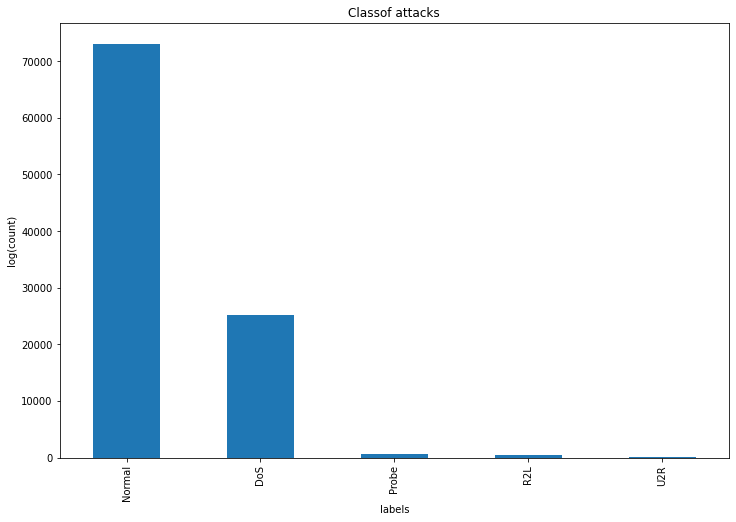

In [24]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks')
df['label'].value_counts().plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

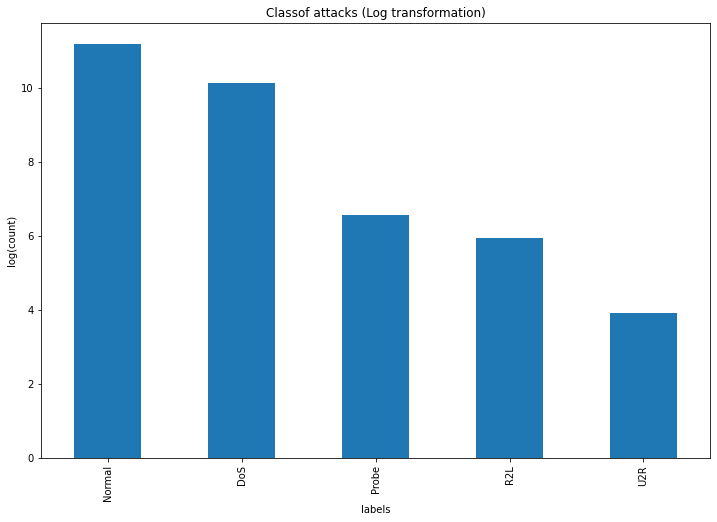

In [25]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

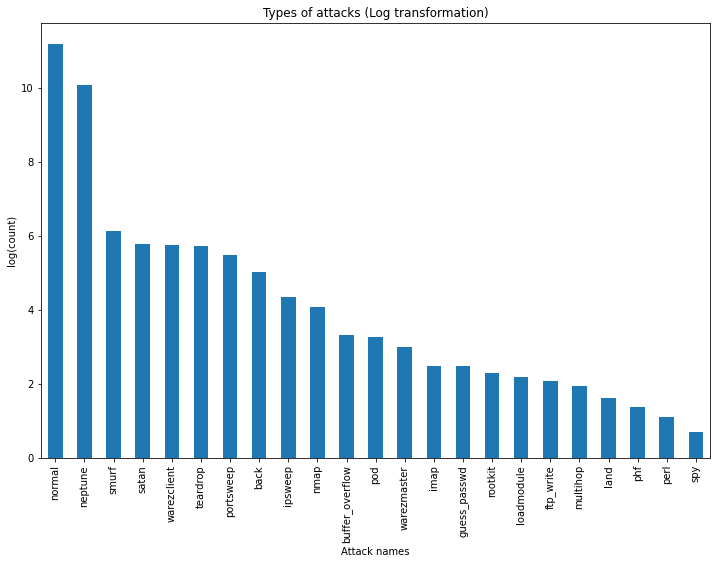

In [26]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [28]:
dummies = pd.get_dummies(df[['label']],drop_first=False)
df = df.drop(['label'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [29]:
df.tail(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,...,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label_DoS,label_Normal,label_Probe,label_R2L,label_U2R
465603,0,227,3,14,1,0.06,0.06,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465604,0,103,45,19,1,0.06,0.18,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465607,0,264,45,16,1,0.06,0.06,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465608,0,273,45,18,1,0.06,0.07,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465610,0,291,53,16,1,0.05,0.05,2,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,310,4,22,5,1,0.00,1.00,9,1881,0.00,...,0,0,0,0,normal,0,1,0,0,0
494016,282,6,22,6,1,0.00,1.00,9,2286,0.00,...,0,0,0,0,normal,0,1,0,0,0
494017,203,6,22,18,1,0.00,1.00,9,1200,0.11,...,0,0,0,0,normal,0,1,0,0,0
494018,291,6,22,12,1,0.00,1.00,9,1200,0.00,...,0,0,0,0,normal,0,1,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [31]:
xn=df.drop(['label_DoS','label_Normal','label_Probe','label_U2R','label_R2L','attack_types'],axis=1)
#xn=df.drop(['attack_types','label'],axis=1)
yn=df[['label_Normal','label_DoS','label_Probe','label_R2L','label_U2R']]
from sklearn.model_selection import train_test_split
xtrn,xten,ytrn,yten=train_test_split(xn,yn,test_size=0.35,random_state=69)

In [32]:
yn

,label_Normal,label_DoS,label_Probe,label_R2L,label_U2R
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
494015,1,0,0,0,0
494016,1,0,0,0,0
494017,1,0,0,0,0
494018,1,0,0,0,0


In [33]:
%matplotlib inline

import itertools
#import numpy as np

#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
np.random.seed(0)

In [34]:
clf1 = RandomForestClassifier()
clf2 = KNeighborsClassifier(n_neighbors=2)    
 
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=3)

In [35]:
label = ['Random Forest', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, xtrn, ytrn, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    m = OneVsRestClassifier(clf)
    m.fit(xtrn, ytrn)
    pred=m.predict(xten)
    print(classification_report(yten,pred))
    ytt=yten.to_numpy()
    #ptt=pred.to_numpy()
    print(confusion_matrix(ytt.argmax(axis=1),pred.argmax(axis=1)))

Accuracy: 1.00 (+/- 0.00) [Random Forest]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       1.00      1.00      1.00      8932
           2       0.95      0.95      0.95       240
           3       0.98      0.87      0.92       137
           4       0.86      0.55      0.67        11

   micro avg       1.00      1.00      1.00     34816
   macro avg       0.96      0.87      0.91     34816
weighted avg       1.00      1.00      1.00     34816
 samples avg       1.00      1.00      1.00     34816

[[25481     4     7     3     1]
 [    2  8928     2     0     0]
 [    5     6   229     0     0]
 [   17     1     0   119     0]
 [    4     0     1     0     6]]
Accuracy: 0.99 (+/- 0.00) [K-NN]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 291, in _fit
    y = se

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       1.00      1.00      1.00      8932
           2       0.94      0.62      0.75       240
           3       1.00      0.89      0.94       137
           4       0.71      0.45      0.56        11

   micro avg       1.00      0.99      1.00     34816
   macro avg       0.93      0.79      0.85     34816
weighted avg       1.00      0.99      1.00     34816
 samples avg       0.99      0.99      0.99     34816

[[25486     2     6     0     2]
 [   41  8889     2     0     0]
 [   52    40   148     0     0]
 [   15     0     0   122     0]
 [    5     0     1     0     5]]
Accuracy: nan (+/- nan) [Bagging Tree]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 291, in _fit
    y = se

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       1.00      1.00      1.00      8932
           2       0.96      0.95      0.95       240
           3       0.99      0.87      0.93       137
           4       0.83      0.45      0.59        11

   micro avg       1.00      1.00      1.00     34816
   macro avg       0.96      0.85      0.89     34816
weighted avg       1.00      1.00      1.00     34816
 samples avg       1.00      1.00      1.00     34816

[[25486     3     6     0     1]
 [    5  8926     1     0     0]
 [    8     6   226     0     0]
 [   18     1     0   118     0]
 [    5     0     1     0     5]]
Accuracy: nan (+/- nan) [Bagging K-NN]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       0.99      1.00      1.00      8932
           2       0.91      0.66      0.77       240
           3       0.99      0.89  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pickle 

In [37]:
filename = 'finalized_model.sav'

In [38]:
pickle.dump(m, open(filename, 'wb'))


In [39]:
loaded_model = pickle.load(open(filename, 'rb'))

In [40]:
new = xten.to_numpy()

In [41]:
new[0]

array([3.680e+02, 1.000e+00, 2.200e+01, 9.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 9.000e+00, 2.609e+03, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [42]:
result = loaded_model.predict([new[593]])
print(result)

[[0 1 0 0 0]]
